## Deep CNN Architecture 1


In [1]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver
from cs231n.classifiers.convnet2 import *
from cs231n.classifiers.convnet3 import *
from time import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))


In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape


X_val:  (1000L, 3L, 32L, 32L)
X_train:  (49000L, 3L, 32L, 32L)
X_test:  (1000L, 3L, 32L, 32L)
y_val:  (1000L,)
y_train:  (49000L,)
y_test:  (1000L,)


In [6]:
best_model = None
best_val = -1
results = {}
solvers = {}
times = {}

network_architectures =  {'{CONV064}x2-Pool-{CONV128}x3-Pool':([[64,64],[128,128,128]],[[3,3],[3,3,3]])
                        }
learning_rates = [2e-4]
regularization_strengths = [0.001]

for label, network in sorted(network_architectures.iteritems()):
    print 'CONV Network:', label
    for i in range(1):
        print 'Run number: %d '% i
        n, f = network
        version = 1
        for lr in learning_rates:
            for reg in regularization_strengths:
                print 'Learning rate: %e Reg Strength: %e '% (lr, reg)
                num_filters, filter_sizes = network
                model = DeepConvNet2(num_filters=num_filters, filter_sizes=filter_sizes, weight_scale=1e-2, 
                                     hidden_dim=500, reg=reg, verbose=False, xavier=True)

                t1 = time()               
                solver = Solver(model, data,
                    num_epochs=5, batch_size=50,
                    update_rule='adam',
                    optim_config={
                      'learning_rate': lr,
                    }, lr_decay=0.95, verbose=True, print_every=20)
                solvers[(label,i,version,lr,reg)] = solver
                solver.train()
                t2 = time()

                times[(label,i,version,lr,reg)] = (t2 - t1)
                print 'Training Time: %fs' % (t2 - t1)
        
                results[(label,i,version,lr,reg)] = solver.best_val_acc
  
                if (solver.best_val_acc > best_val):
                    best_val = solver.best_val_acc
                    best_model = model
            
                version += 1

CONV Network: {CONV064}x2-Pool-{CONV128}x3-Pool
Run number: 0 
Learning rate: 2.000000e-04 Reg Strength: 1.000000e-03 
(Iteration 1 / 4900) loss: 5.656090
(Epoch 0 / 5) train acc: 0.091000; val_acc: 0.102000
(Iteration 21 / 4900) loss: 3.154286
(Iteration 41 / 4900) loss: 2.812181
(Iteration 61 / 4900) loss: 2.690910
(Iteration 81 / 4900) loss: 2.481403
(Iteration 101 / 4900) loss: 2.437306
(Iteration 121 / 4900) loss: 2.442821
(Iteration 141 / 4900) loss: 2.441808
(Iteration 161 / 4900) loss: 2.355138
(Iteration 181 / 4900) loss: 2.356699
(Iteration 201 / 4900) loss: 2.184199
(Iteration 221 / 4900) loss: 2.487927
(Iteration 241 / 4900) loss: 2.122271
(Iteration 261 / 4900) loss: 2.091326
(Iteration 281 / 4900) loss: 2.124112
(Iteration 301 / 4900) loss: 2.244702
(Iteration 321 / 4900) loss: 1.962449
(Iteration 341 / 4900) loss: 2.450677
(Iteration 361 / 4900) loss: 2.106540
(Iteration 381 / 4900) loss: 2.013147
(Iteration 401 / 4900) loss: 2.167951
(Iteration 421 / 4900) loss: 2.12780

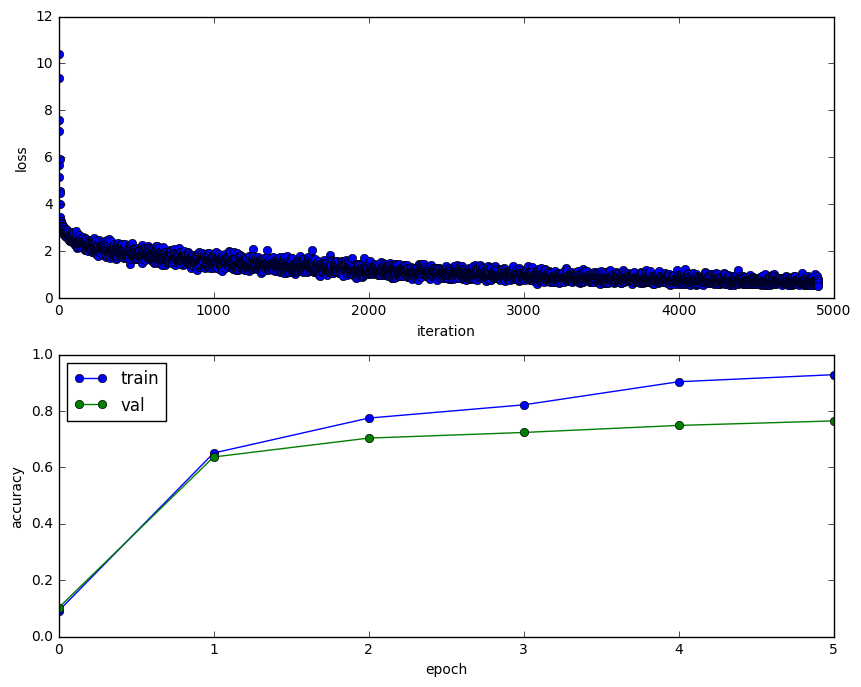

In [7]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [6]:
best_model = None
best_val = -1
results = {}
solvers = {}
times = {}

num_train = 6000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

network_architectures =  {'{CONV032}x3-Pool-{CONV064}x3-Pool':([[32,32,32],[64,64,64]],[[3,3,3],[3,3,3]])
                        }
learning_rates = [1e-4,2e-4, 4e-4]
regularization_strengths = [0.0005,0.001, 0.005]

for label, network in sorted(network_architectures.iteritems()):
    print 'CONV Network:', label
    for i in range(1):
        print 'Run number: %d '% i
        n, f = network
        version = 1
        for lr in learning_rates:
            for reg in regularization_strengths:
                print 'Learning rate: %e Reg Strength: %e '% (lr, reg)
                num_filters, filter_sizes = network
                model = DeepConvNet2(num_filters=num_filters, filter_sizes=filter_sizes, weight_scale=1e-2, 
                                     hidden_dim=500, reg=reg, verbose=False, xavier=True)

                t1 = time()               
                solver = Solver(model, data,
                    num_epochs=3, batch_size=50,
                    update_rule='adam',
                    optim_config={
                      'learning_rate': lr,
                    },verbose=True, print_every=20)
                solvers[(label,i,version,lr,reg)] = solver
                solver.train()
                t2 = time()

                times[(label,i,version,lr,reg)] = (t2 - t1)
                print 'Training Time: %fs' % (t2 - t1)
        
                results[(label,i,version,lr,reg)] = solver.best_val_acc
  
                if (solver.best_val_acc > best_val):
                    best_val = solver.best_val_acc
                    best_model = model
            
                version += 1

CONV Network: {CONV032}x3-Pool-{CONV064}x3-Pool
Run number: 0 
Learning rate: 1.000000e-04 Reg Strength: 5.000000e-04 
(Iteration 1 / 2940) loss: 9.397645
(Epoch 0 / 3) train acc: 0.091000; val_acc: 0.091000
(Iteration 21 / 2940) loss: 2.598382
(Iteration 41 / 2940) loss: 2.312693
(Iteration 61 / 2940) loss: 2.233170
(Iteration 81 / 2940) loss: 2.220841
(Iteration 101 / 2940) loss: 2.229152
(Iteration 121 / 2940) loss: 1.997356
(Iteration 141 / 2940) loss: 2.212183
(Iteration 161 / 2940) loss: 1.976344
(Iteration 181 / 2940) loss: 1.923122
(Iteration 201 / 2940) loss: 2.301316
(Iteration 221 / 2940) loss: 1.704796
(Iteration 241 / 2940) loss: 1.706250
(Iteration 261 / 2940) loss: 1.917876
(Iteration 281 / 2940) loss: 1.893775
(Iteration 301 / 2940) loss: 1.931949
(Iteration 321 / 2940) loss: 1.856638
(Iteration 341 / 2940) loss: 1.695411
(Iteration 361 / 2940) loss: 1.532724
(Iteration 381 / 2940) loss: 1.665579
(Iteration 401 / 2940) loss: 1.603922
(Iteration 421 / 2940) loss: 1.71066

{CONV032}x3-Pool-{CONV064}x3-Pool (Version 1) lr = 1.000000e-04; reg = 5.000000e-04, val accuracy: 0.626000
{CONV032}x3-Pool-{CONV064}x3-Pool (Version 2) lr = 1.000000e-04; reg = 1.000000e-03, val accuracy: 0.648000
{CONV032}x3-Pool-{CONV064}x3-Pool (Version 3) lr = 1.000000e-04; reg = 5.000000e-03, val accuracy: 0.645000
{CONV032}x3-Pool-{CONV064}x3-Pool (Version 4) lr = 2.000000e-04; reg = 5.000000e-04, val accuracy: 0.690000
{CONV032}x3-Pool-{CONV064}x3-Pool (Version 5) lr = 2.000000e-04; reg = 1.000000e-03, val accuracy: 0.677000
{CONV032}x3-Pool-{CONV064}x3-Pool (Version 6) lr = 2.000000e-04; reg = 5.000000e-03, val accuracy: 0.658000
{CONV032}x3-Pool-{CONV064}x3-Pool (Version 7) lr = 4.000000e-04; reg = 5.000000e-04, val accuracy: 0.672000
{CONV032}x3-Pool-{CONV064}x3-Pool (Version 8) lr = 4.000000e-04; reg = 1.000000e-03, val accuracy: 0.696000
{CONV032}x3-Pool-{CONV064}x3-Pool (Version 9) lr = 4.000000e-04; reg = 5.000000e-03, val accuracy: 0.709000
best validation accuracy ach

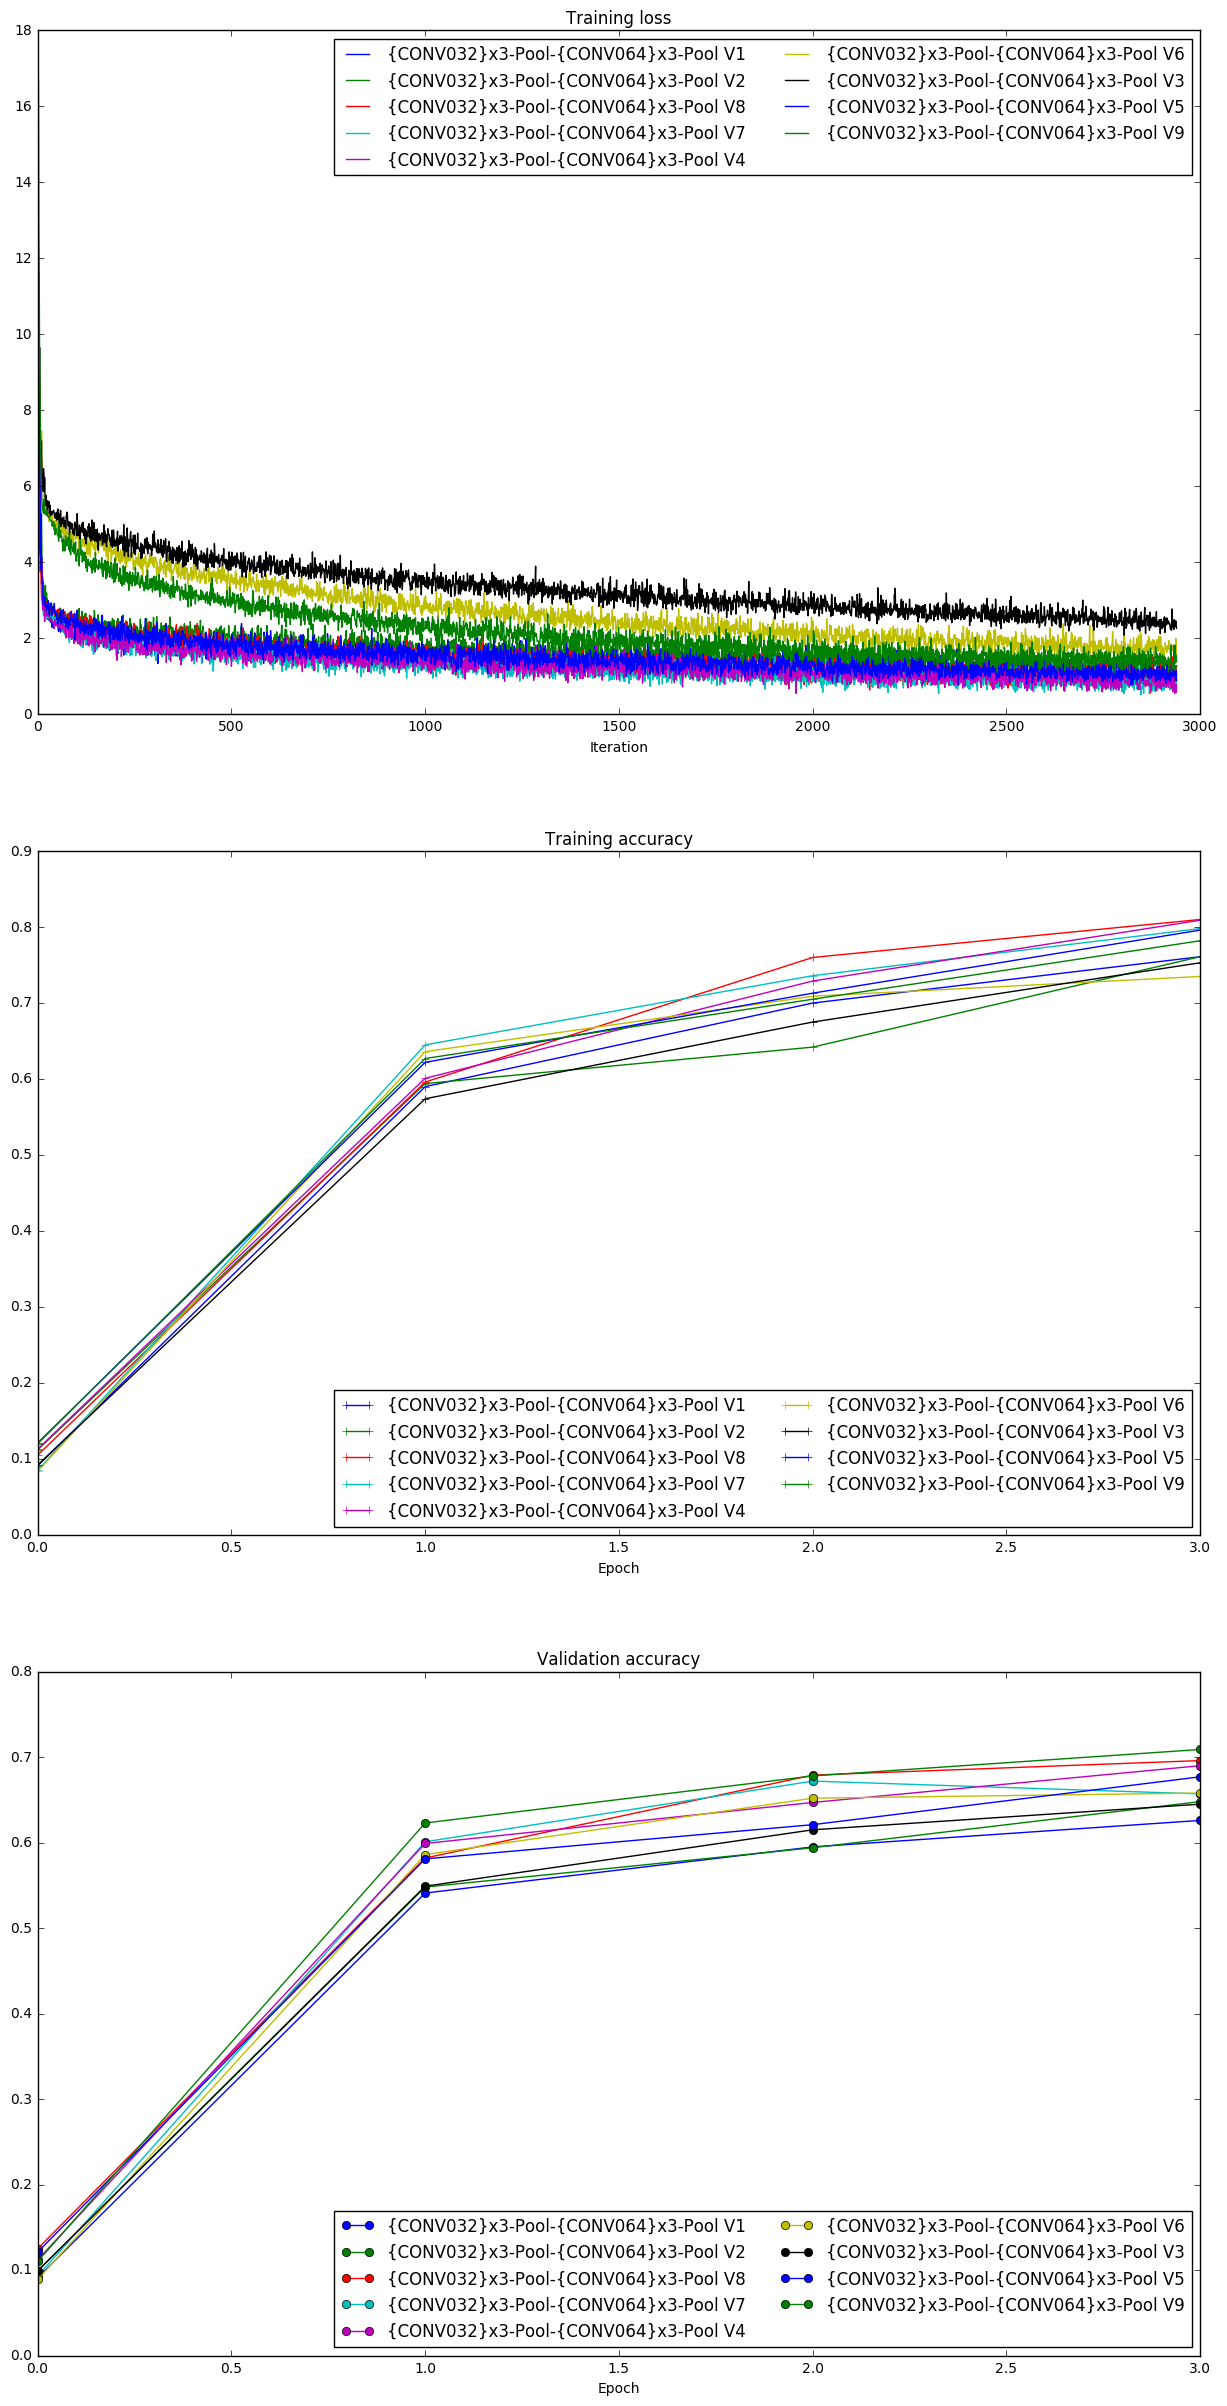

In [7]:
# Print out results.
v = 1
for param,accuracy in sorted(results.iteritems()):
    architecture, i, version, lr, reg = param
    print '%s (Version %d) lr = %e; reg = %e, val accuracy: %f' % (architecture, version, lr, reg, accuracy)
    v += 1
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

print 

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for items, solver in solvers.iteritems():
  label = "%s V%d" % (items[0], items[2])
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, '-', label=label)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-+', label=label)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=label)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='best', ncol=2)
plt.gcf().set_size_inches(15, 30)
plt.show()

In [9]:
t1 = time()
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
t2 = time()

y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print 'Validation set accuracy: ', (y_val_pred == data['y_val']).mean()
print 'Test set accuracy: ', (y_test_pred == data['y_test']).mean()

print 'Testing Time: %fs' % (t2 - t1)

Validation set accuracy:  0.709
Test set accuracy:  0.713
Testing Time: 8.134000s


In [4]:
best_model = None
best_val = -1
results = {}
solvers = {}
times = {}

network_architectures =  {'{CONV032}x3-Pool-{CONV064}x3-Pool':([[32,32,32],[64,64,64]],[[3,3,3],[3,3,3]])
                        }

parameters = {(2e-04, 5e-04),(4e-4,0.001),(4e-4,0.005)}

for label, network in sorted(network_architectures.iteritems()):
    print 'CONV Network:', label
    for i in range(1):
        print 'Run number: %d '% i
        n, f = network
        version = 1
        for lr,reg in parameters:
            print 'Learning rate: %e Reg Strength: %e '% (lr, reg)
            num_filters, filter_sizes = network
            model = DeepConvNet2(num_filters=num_filters, filter_sizes=filter_sizes, weight_scale=1e-2, 
                                     hidden_dim=500, reg=reg, verbose=False, xavier=True)

            t1 = time()               
            solver = Solver(model, data,
                    num_epochs=10, batch_size=50,
                    update_rule='adam',
                    optim_config={
                      'learning_rate': lr,
            },verbose=True, print_every=20)
            solvers[(label,i,version,lr,reg)] = solver
            solver.train()
            t2 = time()

            times[(label,i,version,lr,reg)] = (t2 - t1)
            print 'Training Time: %fs' % (t2 - t1)
        
            results[(label,i,version,lr,reg)] = solver.best_val_acc
  
            if (solver.best_val_acc > best_val):
                best_val = solver.best_val_acc
                best_model = model
            
            version += 1

CONV Network: {CONV032}x3-Pool-{CONV064}x3-Pool
Run number: 0 
Learning rate: 4.000000e-04 Reg Strength: 5.000000e-03 
(Iteration 1 / 9800) loss: 11.816940
(Epoch 0 / 10) train acc: 0.119000; val_acc: 0.120000
(Iteration 21 / 9800) loss: 5.450635
(Iteration 41 / 9800) loss: 5.066327
(Iteration 61 / 9800) loss: 4.837688
(Iteration 81 / 9800) loss: 4.705861
(Iteration 101 / 9800) loss: 4.313178
(Iteration 121 / 9800) loss: 4.171212
(Iteration 141 / 9800) loss: 4.186997
(Iteration 161 / 9800) loss: 4.421195
(Iteration 181 / 9800) loss: 3.877011
(Iteration 201 / 9800) loss: 3.796498
(Iteration 221 / 9800) loss: 3.893750
(Iteration 241 / 9800) loss: 3.853203
(Iteration 261 / 9800) loss: 3.728550
(Iteration 281 / 9800) loss: 3.800301
(Iteration 301 / 9800) loss: 3.698115
(Iteration 321 / 9800) loss: 3.283960
(Iteration 341 / 9800) loss: 3.523756
(Iteration 361 / 9800) loss: 3.464785
(Iteration 381 / 9800) loss: 3.194113
(Iteration 401 / 9800) loss: 3.256632
(Iteration 421 / 9800) loss: 3.137

{CONV032}x3-Pool-{CONV064}x3-Pool (Version 1) lr = 4.000000e-04; reg = 5.000000e-03, val accuracy: 0.775000
{CONV032}x3-Pool-{CONV064}x3-Pool (Version 2) lr = 4.000000e-04; reg = 1.000000e-03, val accuracy: 0.749000
{CONV032}x3-Pool-{CONV064}x3-Pool (Version 3) lr = 2.000000e-04; reg = 5.000000e-04, val accuracy: 0.724000
best validation accuracy achieved during cross-validation: 0.775000



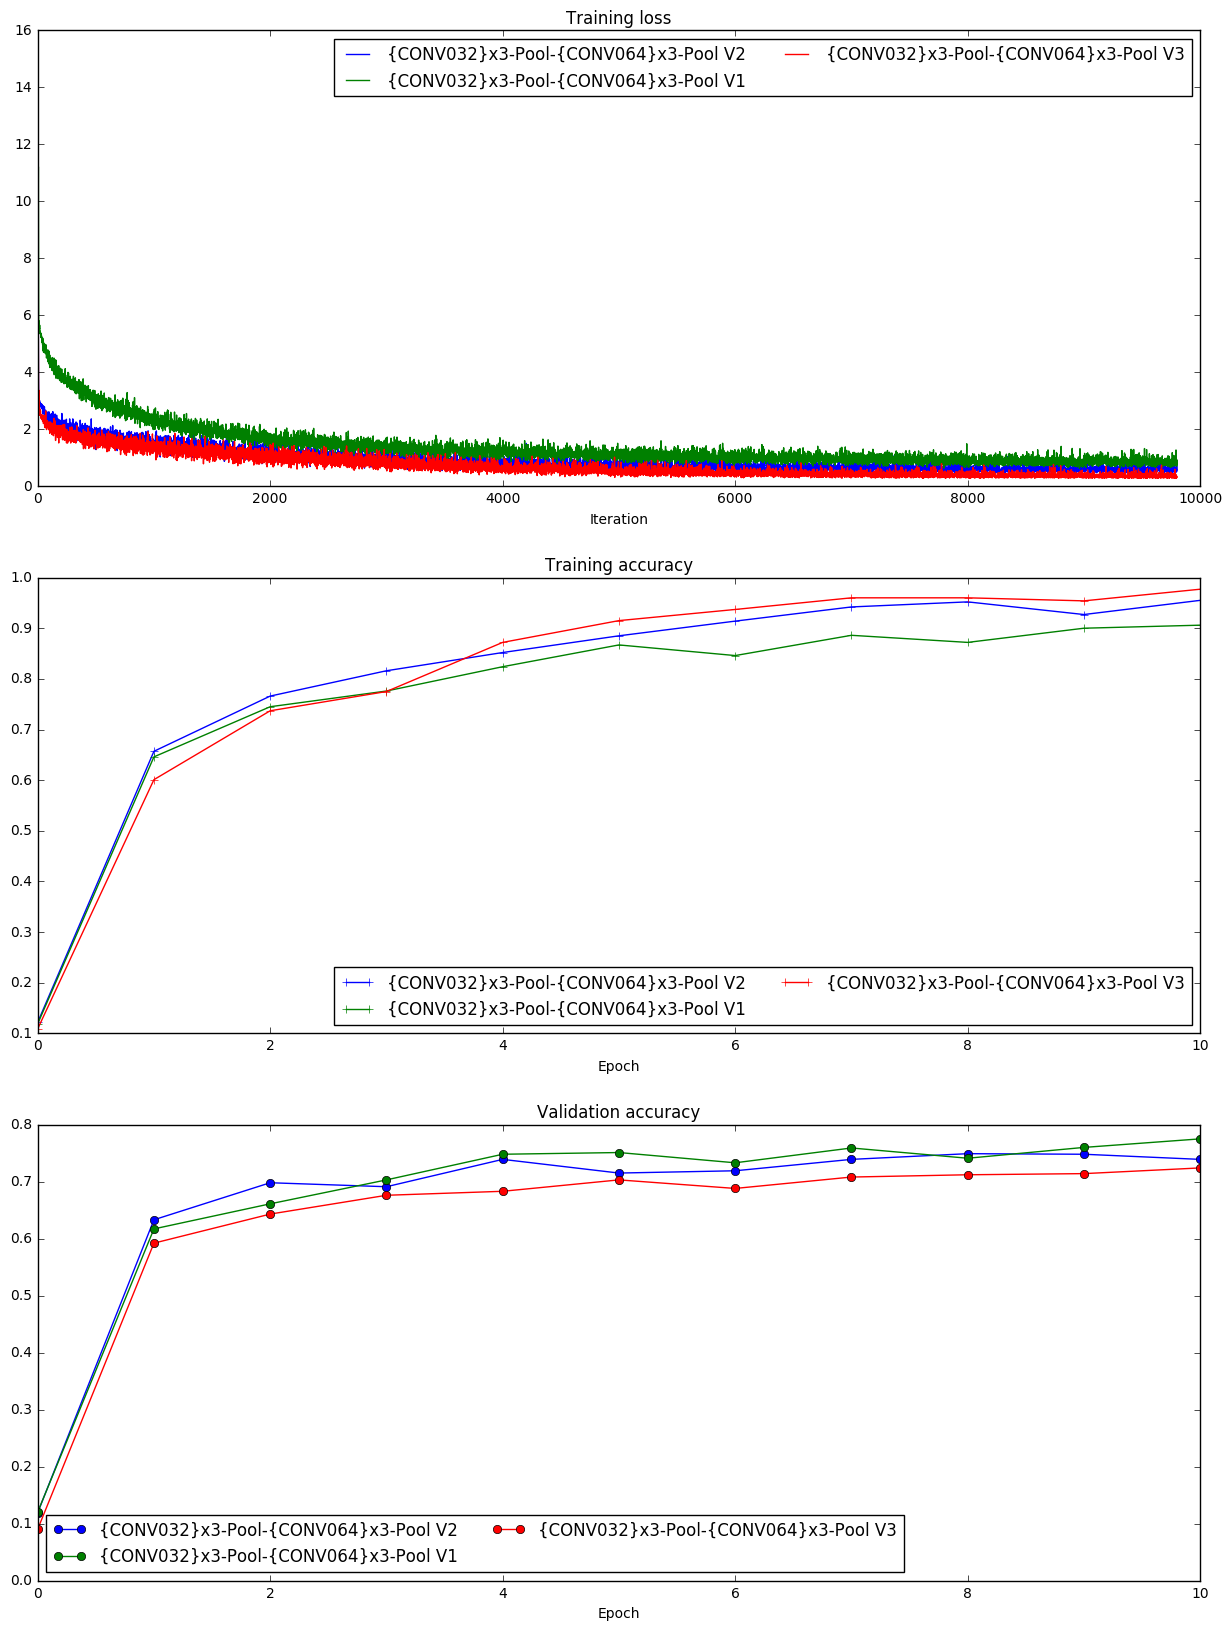

In [6]:
# Print out results.
v = 1
for param,accuracy in sorted(results.iteritems()):
    architecture, i, version, lr, reg = param
    print '%s (Version %d) lr = %e; reg = %e, val accuracy: %f' % (architecture, version, lr, reg, accuracy)
    v += 1
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

print 

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for items, solver in solvers.iteritems():
  label = "%s V%d" % (items[0], items[2])
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, '-', label=label)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-+', label=label)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=label)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='best', ncol=2)
plt.gcf().set_size_inches(15, 20)
plt.show()

In [7]:
t1 = time()
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
t2 = time()

y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print 'Validation set accuracy: ', (y_val_pred == data['y_val']).mean()
print 'Test set accuracy: ', (y_test_pred == data['y_test']).mean()

print 'Testing Time: %fs' % (t2 - t1)

Validation set accuracy:  0.775
Test set accuracy:  0.751
Testing Time: 13.469000s


In [11]:
from cs231n.classifiers.convnet3 import *

best_model = None
best_val = -1
results = {}
solvers = {}
times = {}

network_architectures =  {'{CONV064}x3-Pool-{CONV128}x3-Pool':([[64,64,64],[128,128,128]],[[3,3,3],[3,3,3]])
                        }

parameters = {(4e-4,0.005)}

for label, network in sorted(network_architectures.iteritems()):
    print 'CONV Network:', label
    for i in range(1):
        print 'Run number: %d '% i
        n, f = network
        version = 1
        for lr,reg in parameters:
            print 'Learning rate: %e Reg Strength: %e '% (lr, reg)
            num_filters, filter_sizes = network
            model = DeepConvNet3(num_filters=num_filters, filter_sizes=filter_sizes, weight_scale=1e-2, 
                                     hidden_dim=500, reg=reg, verbose=False, use_batchnorm=True)

            t1 = time()               
            solver = Solver(model, data,
                    num_epochs=5, batch_size=50,
                    update_rule='adam',
                    optim_config={
                      'learning_rate': lr,
            }, lr_decay=0.95, verbose=True, print_every=20)
            solvers[(label,i,version,lr,reg)] = solver
            solver.train()
            t2 = time()

            times[(label,i,version,lr,reg)] = (t2 - t1)
            print 'Training Time: %fs' % (t2 - t1)
        
            results[(label,i,version,lr,reg)] = solver.best_val_acc
  
            if (solver.best_val_acc > best_val):
                best_val = solver.best_val_acc
                best_model = model
            
            version += 1

CONV Network: {CONV064}x3-Pool-{CONV128}x3-Pool
Run number: 0 
Learning rate: 4.000000e-04 Reg Strength: 5.000000e-03 
(Iteration 1 / 4900) loss: 3.404474
(Epoch 0 / 5) train acc: 0.096000; val_acc: 0.111000
(Iteration 21 / 4900) loss: 2.919518
(Iteration 41 / 4900) loss: 2.706245
(Iteration 61 / 4900) loss: 2.677974
(Iteration 81 / 4900) loss: 2.262172
(Iteration 101 / 4900) loss: 1.961982
(Iteration 121 / 4900) loss: 1.921695
(Iteration 141 / 4900) loss: 1.733123
(Iteration 161 / 4900) loss: 1.662370
(Iteration 181 / 4900) loss: 1.721271
(Iteration 201 / 4900) loss: 1.633100
(Iteration 221 / 4900) loss: 1.445530
(Iteration 241 / 4900) loss: 1.410044
(Iteration 261 / 4900) loss: 1.463779
(Iteration 281 / 4900) loss: 1.292687
(Iteration 301 / 4900) loss: 1.543998
(Iteration 321 / 4900) loss: 1.362000
(Iteration 341 / 4900) loss: 1.461376
(Iteration 361 / 4900) loss: 1.477488
(Iteration 381 / 4900) loss: 1.579177
(Iteration 401 / 4900) loss: 1.142390
(Iteration 421 / 4900) loss: 1.33203

{CONV064}x3-Pool-{CONV128}x3-Pool (Version 1) lr = 4.000000e-04; reg = 5.000000e-03, val accuracy: 0.781000
best validation accuracy achieved during cross-validation: 0.781000



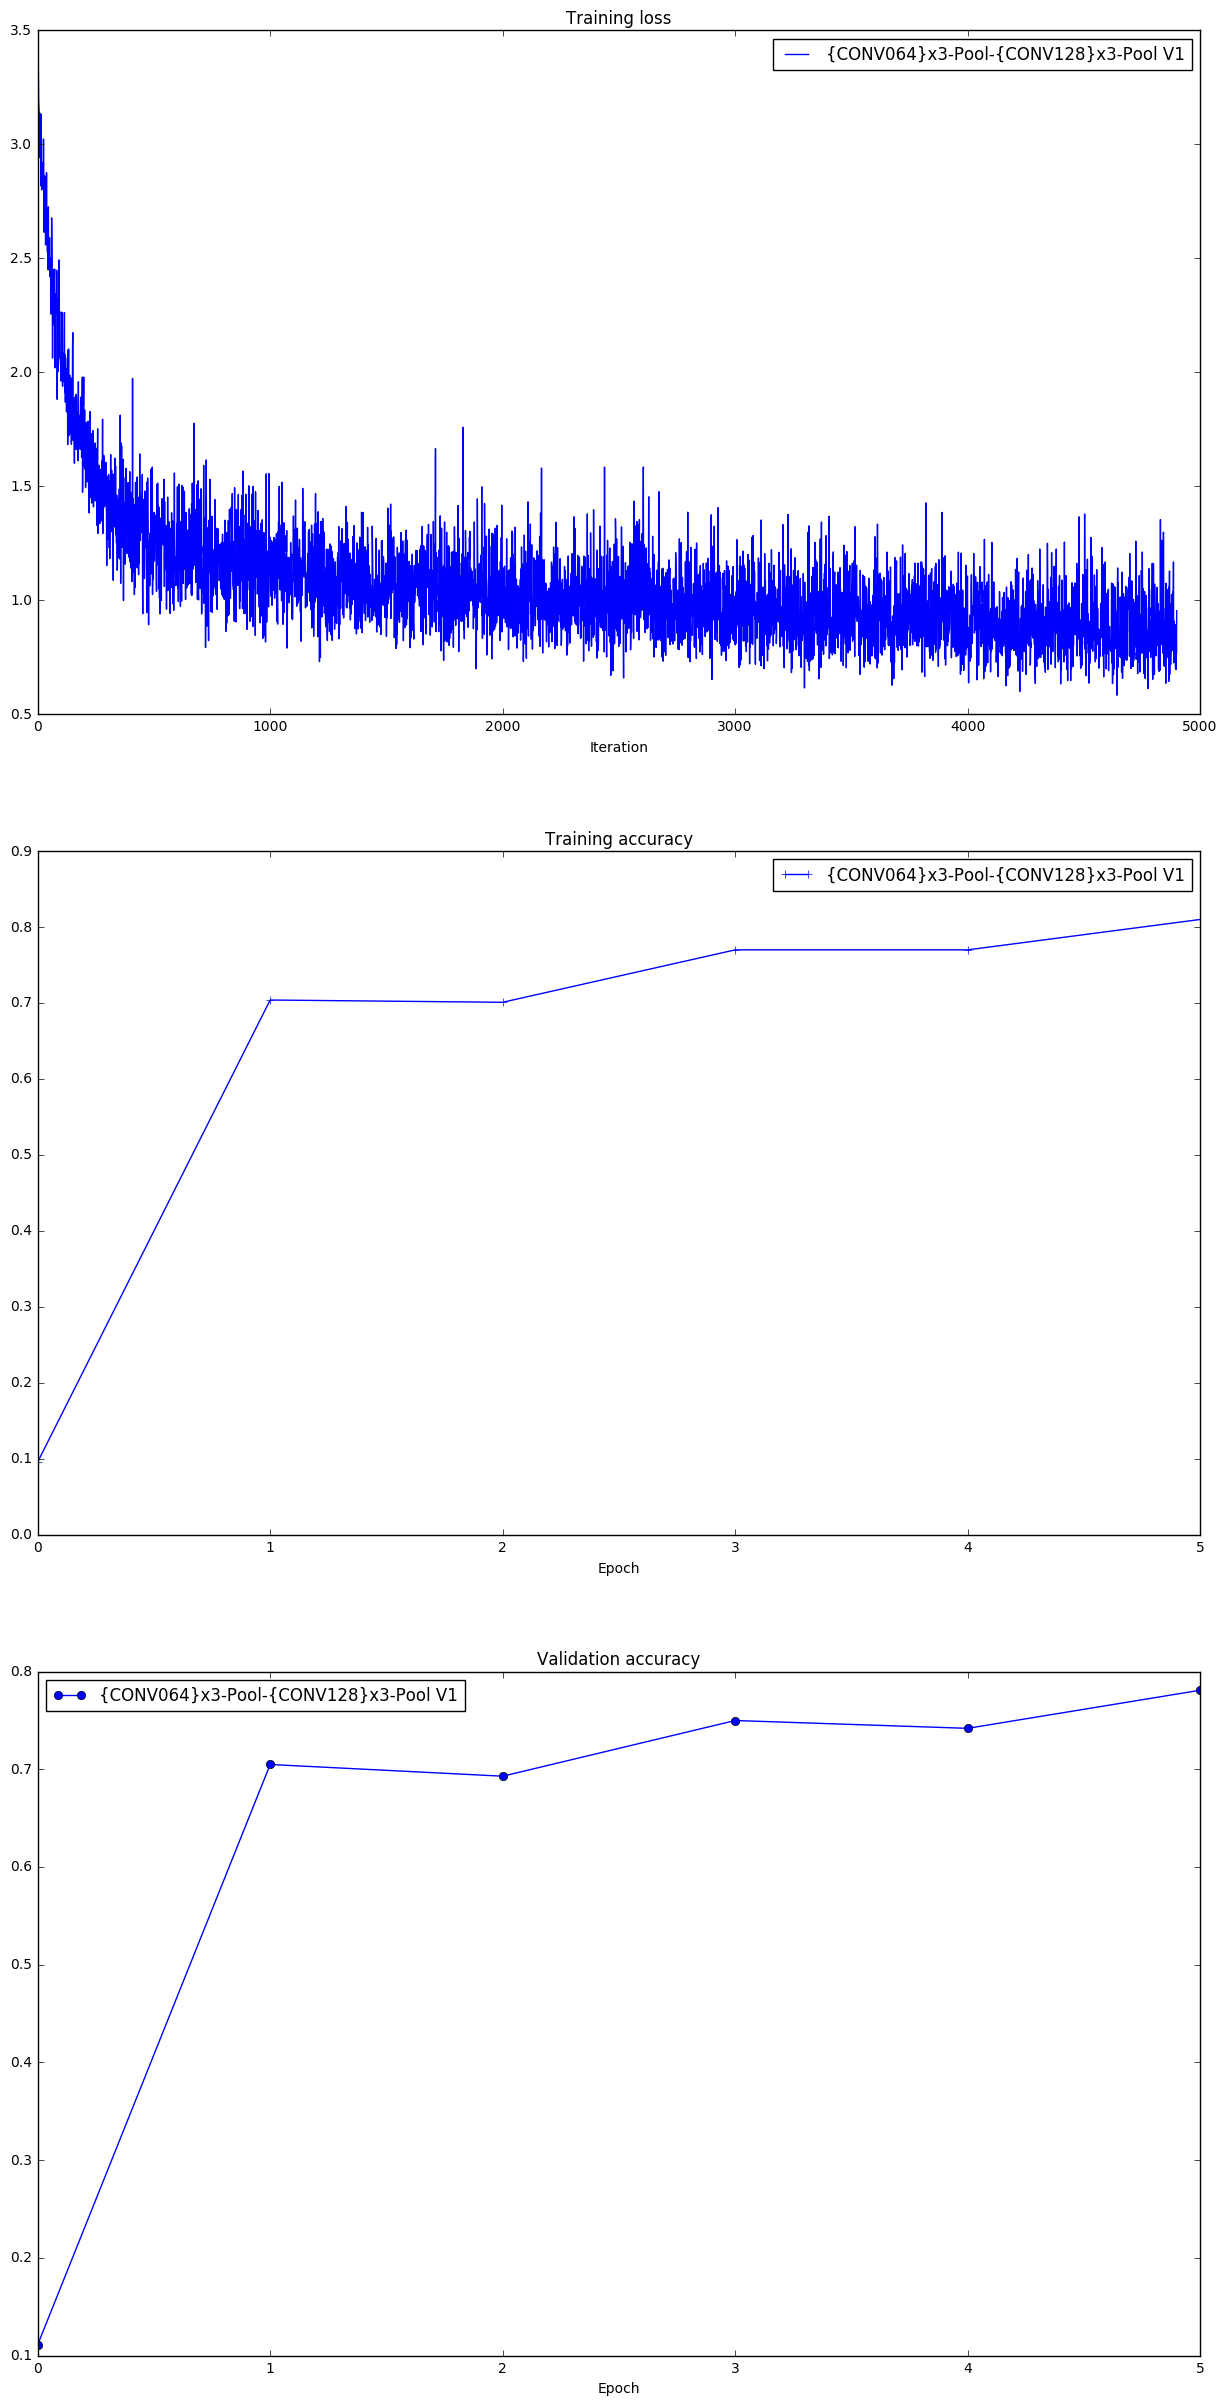

In [12]:
# Print out results.
v = 1
for param,accuracy in sorted(results.iteritems()):
    architecture, i, version, lr, reg = param
    print '%s (Version %d) lr = %e; reg = %e, val accuracy: %f' % (architecture, version, lr, reg, accuracy)
    v += 1
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

print 

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for items, solver in solvers.iteritems():
  label = "%s V%d" % (items[0], items[2])
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, '-', label=label)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-+', label=label)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=label)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='best', ncol=2)
plt.gcf().set_size_inches(15, 30)
plt.show()

In [39]:
from cs231n.classifiers.convnet3 import *

outfile = 'bestparams.npz'
npzfile = np.load(outfile)
print('npzfile.files: {}'.format(npzfile.files))
best_params = npzfile["arr_0"].item()

best_model = None
best_val = -1
results = {}
solvers = {}
times = {}

network_architectures =  {'{CONV064}x2-Pool-{CONV128}x3-Pool':([[64,64],[128,128,128]],[[3,3],[3,3,3]])
                        }
learning_rates = [2e-4*0.95**10]
regularization_strengths = [0.001]

for label, network in sorted(network_architectures.iteritems()):
    print 'CONV Network:', label
    for i in range(1):
        print 'Run number: %d '% i
        n, f = network
        version = 1
        for lr in learning_rates:
            for reg in regularization_strengths:
                print 'Learning rate: %e Reg Strength: %e '% (lr, reg)
                num_filters, filter_sizes = network
                model = DeepConvNet3(num_filters=num_filters, filter_sizes=filter_sizes, weight_scale=1e-2, 
                                     hidden_dim=500, reg=reg, verbose=False, use_batchnorm=True)
 
                model.params = best_params  # Transfer parameters from models trained for 10 epochs

                t1 = time()               
                solver = Solver(model, data,
                    num_epochs=10, batch_size=50,
                    update_rule='adam',
                    optim_config={
                      'learning_rate': lr,
                    }, lr_decay=0.95, verbose=True, print_every=20)
                solvers[(label,i,version,lr,reg)] = solver
                solver.train()
                t2 = time()

                times[(label,i,version,lr,reg)] = (t2 - t1)
                print 'Training Time: %fs' % (t2 - t1)
        
                results[(label,i,version,lr,reg)] = solver.best_val_acc
  
                if (solver.best_val_acc > best_val):
                    best_val = solver.best_val_acc
                    best_model = model
            
                version += 1

npzfile.files: ['arr_0']
CONV Network: {CONV064}x2-Pool-{CONV128}x3-Pool
Run number: 0 
Learning rate: 1.197474e-04 Reg Strength: 1.000000e-03 
(Iteration 1 / 9800) loss: 0.242890
(Epoch 0 / 10) train acc: 0.250000; val_acc: 0.230000
(Iteration 21 / 9800) loss: 0.428763
(Iteration 41 / 9800) loss: 0.216675
(Iteration 61 / 9800) loss: 0.201806
(Iteration 81 / 9800) loss: 0.232336
(Iteration 101 / 9800) loss: 0.182451
(Iteration 121 / 9800) loss: 0.173297
(Iteration 141 / 9800) loss: 0.190168
(Iteration 161 / 9800) loss: 0.279800
(Iteration 181 / 9800) loss: 0.212770
(Iteration 201 / 9800) loss: 0.209460
(Iteration 221 / 9800) loss: 0.224360
(Iteration 241 / 9800) loss: 0.206679
(Iteration 261 / 9800) loss: 0.210860
(Iteration 281 / 9800) loss: 0.212197
(Iteration 301 / 9800) loss: 0.235277
(Iteration 321 / 9800) loss: 0.187021
(Iteration 341 / 9800) loss: 0.308321
(Iteration 361 / 9800) loss: 0.201158
(Iteration 381 / 9800) loss: 0.248456
(Iteration 401 / 9800) loss: 0.217838
(Iteration

{CONV064}x2-Pool-{CONV128}x3-Pool (Version 1) lr = 1.197474e-04; reg = 1.000000e-03, val accuracy: 0.858000
best validation accuracy achieved during cross-validation: 0.858000



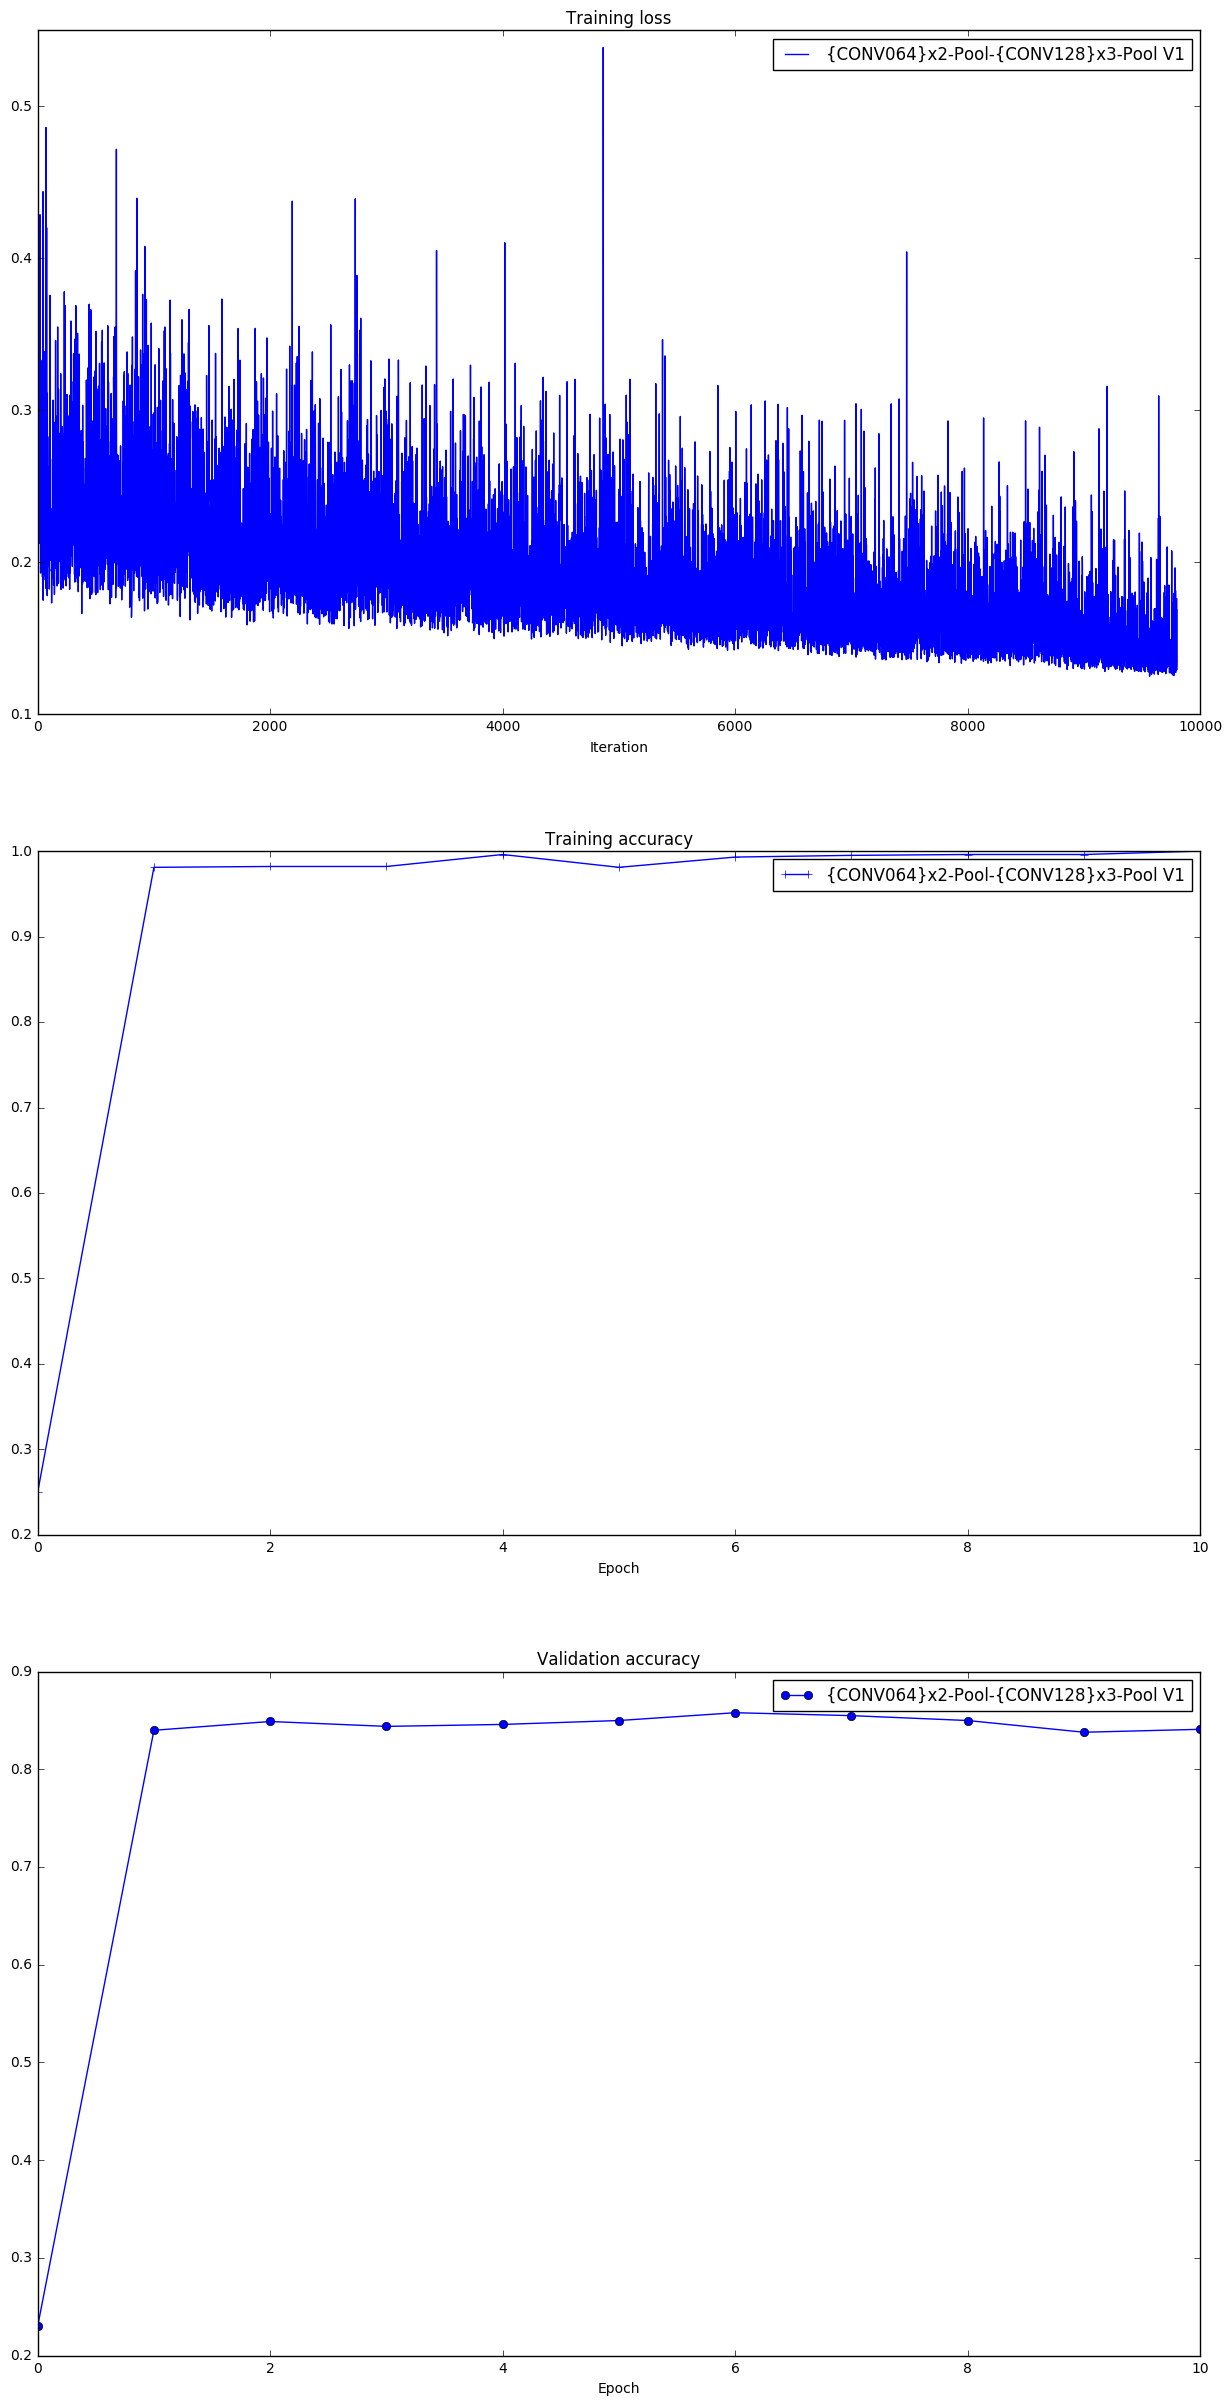

In [40]:
# Print out results.
v = 1
for param,accuracy in sorted(results.iteritems()):
    architecture, i, version, lr, reg = param
    print '%s (Version %d) lr = %e; reg = %e, val accuracy: %f' % (architecture, version, lr, reg, accuracy)
    v += 1
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

print 

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for items, solver in solvers.iteritems():
  label = "%s V%d" % (items[0], items[2])
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, '-', label=label)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-+', label=label)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=label)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='best', ncol=2)
plt.gcf().set_size_inches(15, 30)
plt.show()

In [16]:
print best_model.params.keys()
outfile = 'bestparams_64x2_128x3_20epochs.npz'

np.savez(outfile, best_model.params)

[(1, 2, 'W'), (0, 0, 'b'), (1, 1, 'beta'), (1, 0, 'b'), (1, 1, 'gamma'), (2, 0, 'b'), (1, 0, 'beta'), (0, 1, 'b'), (0, 0, 'gamma'), (0, 1, 'beta'), (1, 1, 'W'), (1, 2, 'gamma'), (1, 0, 'W'), (2, 0, 'gamma'), (1, 1, 'b'), (0, 1, 'W'), (0, 0, 'W'), (2, 0, 'W'), (2, 1, 'W'), (1, 0, 'gamma'), (1, 2, 'b'), (0, 0, 'beta'), (1, 2, 'beta'), (2, 0, 'beta'), (0, 1, 'gamma'), (2, 1, 'b')]
npzfile.files: ['arr_0']
npzfile["arr_0"]: {(1, 2, 'W'): array([[[[ -1.82068162e-03,  -3.73778073e-03,   2.14280225e-02],
         [  5.32289827e-03,  -2.14348249e-02,   2.29300046e-03],
         [  2.60311924e-03,  -3.00912978e-03,   1.12715131e-02]],

        [[  2.73835845e-03,   1.79987289e-02,   1.20896650e-02],
         [ -8.98718776e-04,   5.02746506e-03,   1.44153470e-02],
         [  1.46221006e-02,   9.50852409e-03,   1.63232535e-02]],

        [[ -8.11589707e-05,  -2.75111874e-03,  -1.62203480e-02],
         [  1.81057095e-03,   1.80571427e-04,  -3.63021456e-02],
         [ -1.29110804e-02,  -2.631705

In [41]:
t1 = time()
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
t2 = time()

y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print 'Validation set accuracy: ', (y_val_pred == data['y_val']).mean()
print 'Test set accuracy: ', (y_test_pred == data['y_test']).mean()

print 'Testing Time: %fs' % (t2 - t1)

Validation set accuracy:  0.739
Test set accuracy:  0.703
Testing Time: 29.275000s
